In [4]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
df=pd.read_csv("/Users/bididudy/Downloads/Business Analyst course/Statistics and Descriptive Analytics/Multilinear Regression/salaries.csv")

In [3]:
df.head(5)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [5]:
#Analyzing the data
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


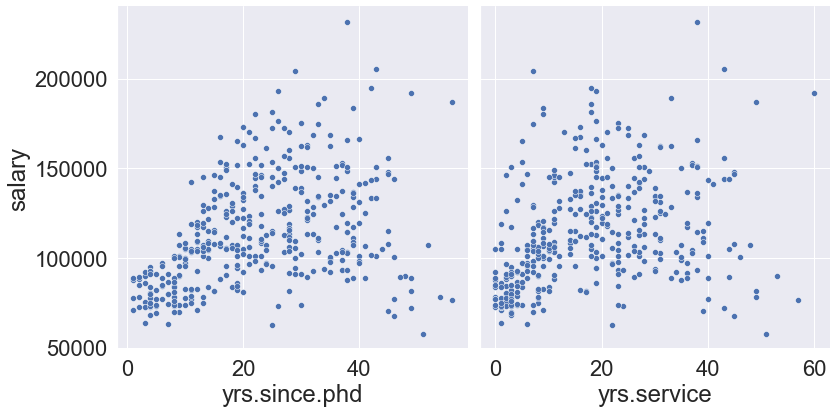

In [6]:
# plotting continuos IV gainst dependent variable
sns.set(font_scale=2)
sns.pairplot(data=df,
            y_vars=['salary'],
            x_vars=['yrs.since.phd','yrs.service'],
            height=6)

<AxesSubplot:>

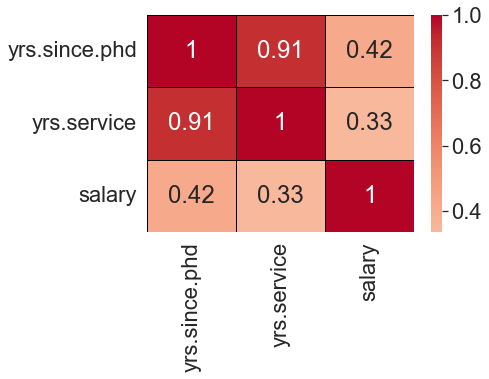

In [8]:
# correlation matrix

sns.heatmap(df.corr(),
           annot=True,
           fmt='0.2g',
           center=0,
           cmap='coolwarm',
           linewidths=1,
           linecolor='black')

In [9]:
# Categorical variables
df.select_dtypes(include = 'object').value_counts()

rank       discipline  sex   
Prof       B           Male      125
           A           Male      123
AsstProf   B           Male       38
AssocProf  B           Male       32
           A           Male       22
AsstProf   A           Male       18
Prof       B           Female     10
           A           Female      8
AssocProf  B           Female      6
AsstProf   A           Female      6
           B           Female      5
AssocProf  A           Female      4
dtype: int64

In [13]:
# For loop categorical variables
categorical = list(df.select_dtypes(include = 'object'))

for cat in categorical:
    print(df[cat].value_counts())

Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64
B    216
A    181
Name: discipline, dtype: int64
Male      358
Female     39
Name: sex, dtype: int64


In [14]:
# Creating dummy variable for categorical variable

df1 = pd.get_dummies( data=df, drop_first= True)
df1

,yrs.since.phd,yrs.service,salary,rank_AsstProf,rank_Prof,discipline_B,sex_Male
0,19,18,139750,0,1,1,1
1,20,16,173200,0,1,1,1
2,4,3,79750,1,0,1,1
3,45,39,115000,0,1,1,1
4,40,41,141500,0,1,1,1
...,...,...,...,...,...,...,...
392,33,30,103106,0,1,0,1
393,31,19,150564,0,1,0,1
394,42,25,101738,0,1,0,1
395,25,15,95329,0,1,0,1


## Multilinear Regression Preparation

In [21]:
# Isolate x and y

# as it is dependent variable
y=df1.salary/1000 # so we can get smaller number

# we remove salary as its dependent variable and yers.service beacause correlation is strong between service years and years since phd 
x=df1.drop(columns = ['salary', 'yrs.service'])

In [22]:
# adding constant
x=sm.add_constant(x)
x.head()

,const,yrs.since.phd,rank_AsstProf,rank_Prof,discipline_B,sex_Male
0,1.0,19,0,1,1,1
1,1.0,20,0,1,1,1
2,1.0,4,1,0,1,1
3,1.0,45,0,1,1,1
4,1.0,40,0,1,1,1


In [28]:
# Training and test set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                   test_size=0.2,
                                                   random_state=1502)
x_train.head(2)


,const,yrs.since.phd,rank_AsstProf,rank_Prof,discipline_B,sex_Male
105,1.0,31,0,1,0,1
287,1.0,2,1,0,0,1


## Multilinear regression

In [24]:
# Multilinear regression

In [25]:
model = sm.OLS(y_train, x_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     56.20
Date:                Wed, 22 Nov 2023   Prob (F-statistic):           1.65e-41
Time:                        21:00:39   Log-Likelihood:                -1424.2
No. Observations:                 317   AIC:                             2860.
Df Residuals:                     311   BIC:                             2883.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            79.6855      5.408     14.735

## Accuracy Assesment

In [29]:
# Predict
predictions = model.predict(x_test)
predictions

364    118.590061
30     134.868270
378    118.731635
188     99.876615
155    134.839955
          ...    
343    134.556808
366    119.382874
79      87.373672
135    119.241300
25     119.212985
Length: 80, dtype: float64

In [37]:
# Accuracy Assesment
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("MAE: ",round(mean_absolute_error(y_test, predictions),1))

print("RMSE: ",round(np.sqrt(mean_squared_error(y_test, predictions)),1))

MAE:  18.2
RMSE:  25.8
